In [ ]:
import pandas as pd

In [ ]:
path = '/content/drive/MyDrive/section4_data.csv'

In [ ]:
df = pd.read_csv(path, index_col=0)

In [ ]:
df

,asin,reviewText,overall,summary
0,0615391206,My daughter wanted this book and the price on ...,5.0,Best Price
1,0615391206,I bought this zoku quick pop for my daughterr ...,5.0,zoku
2,0615391206,This book is a must have if you get a Zoku (wh...,5.0,Creative Combos
3,0615391206,If you have a Zoku Quick Pop maker (or two.......,5.0,Love it
4,0615391206,This book is so beautifully illustrated and ea...,5.0,Beautifully illustrated recipe and instruction...
...,...,...,...,...
349690,B00LBFUU12,These ice pop molds are awesome! Bright kid-ha...,5.0,Summer fun for everyone!
349691,B00LBFUU12,great popsicle molds - very nice quality - and...,5.0,Five Stars
349692,B00LBFUU12,My kids and I are loving these - putting our c...,5.0,... these - putting our creativity to the test...
349693,B00LBFUU12,"I love these ice pop makers. First off, I love...",5.0,love them


In [ ]:
filter = list(df.asin.value_counts()[(df.asin.value_counts()<7)].index)

In [ ]:
df = df[df.asin.isin(filter)].reset_index(drop=True)
df

,asin,reviewText,overall,summary
0,0689027818,This beautifully illustrated book featuring te...,5.0,A sweet book for babies and toddlers
1,0689027818,I got this as a gift for my niece and she love...,5.0,Super cute niece present
2,0689027818,This is the story of a group of butterflies lo...,5.0,My little one absolutely loved this book
3,0689027818,This book is absolutely beautiful. A brilliant...,5.0,My Daughter's New Favorite
4,0689027818,My daughter 1 year old really likes this book....,5.0,My daughter loves it
...,...,...,...,...
56846,B00LAI4UYS,This set is just what I have been looking for ...,5.0,Very attractive ceramic knife set with stylish...
56847,B00LAI4UYS,I was very excited to get to try theZhuhai Pre...,5.0,Great For Slicing...
56848,B00LAI4UYS,I received this set as a review sample and fin...,5.0,Right tool for the right job
56849,B00LAI4UYS,This is a three piece ceramic blade set. You g...,5.0,Super Sharp


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56851 entries, 0 to 56850
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   asin        56851 non-null  object 
 1   reviewText  56834 non-null  object 
 2   overall     56851 non-null  float64
 3   summary     56850 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.7+ MB


In [ ]:
df.isna().sum()

asin           0
reviewText    17
overall        0
summary        1
dtype: int64

In [ ]:
df = df.dropna().reset_index(drop=True)

In [ ]:
import spacy
import re
from spacy.tokenizer import Tokenizer

nlp = spacy.load('en_core_web_sm')
tokenizer = Tokenizer(nlp.vocab)

In [ ]:
def clear(text):

  tokens = re.sub(r'[^a-zA-Z0-9 ]','',text)
  tokens = tokens.lower()

  return tokens

In [ ]:
STOP_WORDS = [' ','  ']

In [ ]:
def get_lemmas(text):

  tokens = []

  doc = nlp(text)

  for token in doc:
    if ((token.is_stop == False) and (token.is_punct==False) and (token.text.lower() not in STOP_WORDS)) and (token.pos_ != 'PRON'):
      tokens.append(token.lemma_)

  return tokens

In [ ]:
df['tokens'] = df['reviewText'].apply(get_lemmas)
df

,asin,reviewText,overall,summary,tokens
0,0689027818,This beautifully illustrated book featuring te...,5.0,A sweet book for babies and toddlers,"[beautifully, illustrate, book, feature, color..."
1,0689027818,I got this as a gift for my niece and she love...,5.0,Super cute niece present,"[get, gift, niece, love, super, cute, book, il..."
2,0689027818,This is the story of a group of butterflies lo...,5.0,My little one absolutely loved this book,"[story, group, butterfly, look, place, sleep, ..."
3,0689027818,This book is absolutely beautiful. A brilliant...,5.0,My Daughter's New Favorite,"[book, absolutely, beautiful, brilliant, bedti..."
4,0689027818,My daughter 1 year old really likes this book....,5.0,My daughter loves it,"[daughter, 1, year, old, like, book, buy, simi..."
...,...,...,...,...,...
56828,B00LAI4UYS,This set is just what I have been looking for ...,5.0,Very attractive ceramic knife set with stylish...,"[set, look, ceramic, knife, like, knife, attra..."
56829,B00LAI4UYS,I was very excited to get to try theZhuhai Pre...,5.0,Great For Slicing...,"[excited, try, theZhuhai, Premium, Ceramic, Kn..."
56830,B00LAI4UYS,I received this set as a review sample and fin...,5.0,Right tool for the right job,"[receive, set, review, sample, find, useful, a..."
56831,B00LAI4UYS,This is a three piece ceramic blade set. You g...,5.0,Super Sharp,"[piece, ceramic, blade, set, 5.5, inch, knife,..."


In [ ]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import squarify
import matplotlib.pyplot as plt

In [ ]:
from collections import Counter

def word_count(docs):

    word_counts = Counter()
    word_in_docs = Counter()
    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        word_in_docs.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())

    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    wc['percent'] = wc['count'].apply(lambda x: x / total)

    wc = wc.sort_values(by='rank')

    wc['cul_percent'] = wc['percent'].cumsum()

    temp2 = zip(word_in_docs.keys(), word_in_docs.values())
    ac = pd.DataFrame(temp2, columns=['word', 'word_in_docs'])
    wc = ac.merge(wc, on='word')

    wc['word_in_docs_percent'] = wc['word_in_docs'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

In [ ]:
wc = word_count(df['tokens'])
wc.head(10)

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
140,use,16091,23339,1.0,0.011184,0.011184,0.283128
2,great,16591,20627,2.0,0.009885,0.021069,0.291925
17,like,14029,19155,3.0,0.009179,0.030248,0.246846
103,buy,13661,17527,4.0,0.008399,0.038647,0.240371
22,good,13188,16972,5.0,0.008133,0.046780,0.232048
121,work,12347,15550,6.0,0.007452,0.054232,0.217251
28,love,12779,15410,7.0,0.007385,0.061617,0.224852
52,look,11702,14924,8.0,0.007152,0.068768,0.205902
179,easy,11624,14533,9.0,0.006964,0.075733,0.204529
89,time,9585,12783,10.0,0.006126,0.081858,0.168652


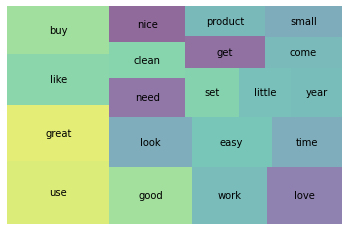

In [ ]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['percent'], label=wc_top20['word'], alpha=0.6 )
plt.axis('off')
plt.show()

In [ ]:
df.to_csv('/content/drive/MyDrive/section4_data_v2.csv')